In [1]:
import pickle as pkl

In [434]:
path="/sdd/berzelius/final_results/delta_0.0/results.pkl"

In [438]:
X = pkl.load(open(f"{path}", "rb"))

In [439]:
PREDS = [x["prediction"] for x in X[1]]

In [444]:
np.vstack(PREDS).shape

(1419705, 174)

In [436]:
len(x[1])

1419705

In [437]:
x[1][0]

{'prediction': array([ 3.55747819e-01, -9.56531367e-05,  0.00000000e+00,  5.24973031e-03,
         0.00000000e+00,  0.00000000e+00,  4.72049654e-01,  9.74652939e-05,
        -1.52497259e-05,  3.44636023e-01, -1.92630861e-04, -1.29731226e-04,
         2.34676182e-01,  1.84007012e-03,  8.43175105e-04,  1.57524377e-01,
         2.87055969e-03,  6.11330557e-04,  3.77644539e-01,  1.48640631e-03,
         2.70188553e-04,  1.28067642e-01,  2.54492881e-03,  3.69636255e-04,
         2.82308877e-01,  5.60097117e-03,  1.72020262e-03,  1.60882816e-01,
         9.27017257e-03, -7.99370813e-04,  3.90282810e-01,  9.91498120e-03,
         1.05996644e-02,  1.91693813e-01,  1.62260279e-01,  1.02174445e-03,
         1.37206137e+00,  2.06997618e-02,  3.66024964e-04,  5.70032656e-01,
         5.95432639e-01,  6.29464106e-04,  2.41217881e-01,  9.69380140e-03,
        -3.23095755e-03,  1.97984278e-02,  3.19470167e-01,  2.52608489e-03,
         5.55131733e-01,  7.62930453e-01,  1.52448937e-02,  2.23687962e-02

In [2]:
%config Completer.use_jedi = False



In [3]:
import pickle
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True


# Find $\delta$

In [117]:
!pwd

/home/ekvall/prosittransformer/notebooks


In [298]:
#X = pickle.load(open("/sdd/berzelius/delta_runs/all_results.pkl", "rb"))
X = pickle.load(open("/home/ekvall/prosittransformer/notebooks/data/all_results.pkl", "rb"))


In [299]:
X

[{'mean_spectral_angle': 0.9080331,
  'fnr': 0.010022976004173461,
  'fdr': 0.5181857200540891,
  'delta': -0.0},
 {'mean_spectral_angle': 0.9068756,
  'fnr': 0.02034850555954033,
  'fdr': 0.4233848454997148,
  'delta': -0.012658227848101266},
 {'mean_spectral_angle': 0.90723604,
  'fnr': 0.027574036992904255,
  'fdr': 0.35448529629348186,
  'delta': -0.02531645569620253},
 {'mean_spectral_angle': 0.9071015,
  'fnr': 0.03387580383005147,
  'fdr': 0.30519604870159756,
  'delta': -0.0379746835443038},
 {'mean_spectral_angle': 0.9068876,
  'fnr': 0.03979140348774673,
  'fdr': 0.269775550312977,
  'delta': -0.05063291139240506},
 {'mean_spectral_angle': 0.9075539,
  'fnr': 0.04393722509273917,
  'fdr': 0.24419915346151624,
  'delta': -0.06329113924050633},
 {'mean_spectral_angle': 0.9073382,
  'fnr': 0.04885825415394576,
  'fdr': 0.2220999414922932,
  'delta': -0.0759493670886076},
 {'mean_spectral_angle': 0.90668714,
  'fnr': 0.05179115897785104,
  'fdr': 0.2105394653487097,
  'delta': -0

In [300]:
data = list()
for x in X:
    metric = "fdr"
    data.append({"delta" : x["delta"], "value" : x[metric], "metric" : metric})
    metric = "fnr"
    data.append({"delta" : x["delta"], "value" : x[metric], "metric" : metric})
    metric = "mean_spectral_angle"
    data.append({"delta" : x["delta"], "value" : x[metric], "metric" : metric})

In [301]:
df = pd.DataFrame(data)

In [352]:
df.loc[df.metric == "fdr", 'metric'] = "FDR"
df.loc[df.metric == "fnr", 'metric'] = "FNR"
df.loc[df.metric == "mean_spectral_angle", 'metric'] = "Angular Similarity"


In [353]:
df_test = df.iloc[[i for i in range(len(df)) if i % 3 == 0 ]]

In [391]:
df_test = df[df.delta.isin(deltas)]

In [428]:
deltas = [d for i, d in enumerate(sorted(list(set(df.delta)))) if i % 2 == 0]

In [85]:
deltas = [d for d in deltas if d > -0.34177215189873417 * 2 + 0.2 and d < -0.34177215189873417 * 2 - 0.2]

NameError: name 'deltas' is not defined

In [423]:
df_test = df[df.delta.isin(deltas)]

In [84]:
deltas

NameError: name 'deltas' is not defined

In [431]:
[0, -0.34177215189873417, -0.6962025316455696]

[0, -0.34177215189873417, -0.6962025316455696]

In [430]:
-0.34177215189873417 * 2

-0.6835443037974683

In [429]:
deltas

[-1.0,
 -0.9746835443037974,
 -0.9493670886075949,
 -0.9240506329113924,
 -0.8987341772151899,
 -0.8734177215189873,
 -0.8481012658227848,
 -0.8227848101265822,
 -0.7974683544303798,
 -0.7721518987341772,
 -0.7468354430379747,
 -0.7215189873417721,
 -0.6962025316455696,
 -0.6708860759493671,
 -0.6455696202531646,
 -0.620253164556962,
 -0.5949367088607594,
 -0.569620253164557,
 -0.5443037974683544,
 -0.5189873417721519,
 -0.49367088607594933,
 -0.46835443037974683,
 -0.4430379746835443,
 -0.4177215189873418,
 -0.3924050632911392,
 -0.3670886075949367,
 -0.34177215189873417,
 -0.31645569620253167,
 -0.2911392405063291,
 -0.26582278481012656,
 -0.24050632911392406,
 -0.21518987341772153,
 -0.18987341772151897,
 -0.16455696202531644,
 -0.13924050632911392,
 -0.11392405063291139,
 -0.08860759493670886,
 -0.06329113924050633,
 -0.0379746835443038,
 -0.012658227848101266]

In [415]:
fs = 18

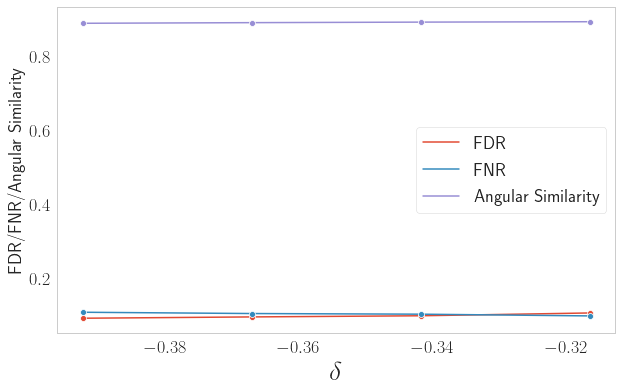

In [416]:
plt.figure(figsize=(10, 6))
ax = seaborn.lineplot(x="delta", y="value", marker="o", hue="metric", data = df_test)
legend = ax.legend(handles=ax.legend_.legendHandles, labels=['FDR', 'FNR', 'Angular Similarity'], prop={"size":fs})


#plt.legend.get_title().set_fontsize('6')
#plt.rcParams['legend.title_fontsize'] = fs
plt.xlabel(r"$\delta$", fontsize=fs + 10)
plt.ylabel("FDR/FNR/Angular Similarity", fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.locator_params(axis='y', nbins=5)
plt.locator_params(axis='x', nbins=6)

#plt.savefig("./compare.png")

In [315]:
import numpy as np

In [272]:
np.linspace(0,0.1,40)

array([0.        , 0.0025641 , 0.00512821, 0.00769231, 0.01025641,
       0.01282051, 0.01538462, 0.01794872, 0.02051282, 0.02307692,
       0.02564103, 0.02820513, 0.03076923, 0.03333333, 0.03589744,
       0.03846154, 0.04102564, 0.04358974, 0.04615385, 0.04871795,
       0.05128205, 0.05384615, 0.05641026, 0.05897436, 0.06153846,
       0.06410256, 0.06666667, 0.06923077, 0.07179487, 0.07435897,
       0.07692308, 0.07948718, 0.08205128, 0.08461538, 0.08717949,
       0.08974359, 0.09230769, 0.09487179, 0.0974359 , 0.1       ])

# Final model result plots

In [4]:
import feather
import seaborn as sns

In [5]:
plt.style.use('ggplot')

In [7]:
path = '/sdd/berzelius/final_results/delta_0.34177215189873417/dataframe.feather'
datafile = feather.read_dataframe(path)

datafile = datafile.rename(columns={"jacc_alpha" : "FDR", 
                                    "jacc_beta" : "FNR", 
                                    "spectral_angle" : "Angular Similarity",
                                   "data_set" : "Data Set"})

datafile["Data Set"] = datafile["Data Set"].map({'ho':"Prosit RNN", 'test':"Prosit Transformer"})

In [8]:
fs = 18

In [9]:
def filterDf(df, feature = "Angular Similarity", lower= 0.5, upper=1):
    mask = ((df[feature]>lower) & (df[feature] < upper))
    return df[mask]

In [10]:
sns.set_style("whitegrid", {'axes.grid' : False})


In [13]:
palette ={'Prosit Transformer': "C1", 'Prosit RNN': "C0"}


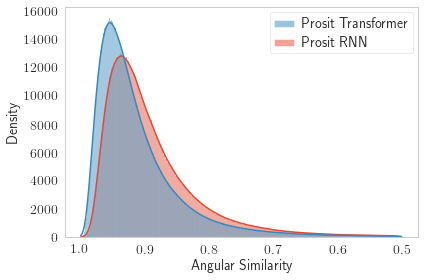

In [14]:
ax = sns.histplot(data=filterDf(datafile), x="Angular Similarity", 
                  hue="Data Set", kde =True, 
                  hue_order= ['Prosit Transformer', 
                              'Prosit RNN'],
                 palette=palette)

ax.invert_xaxis()

#plt.legend(title='', loc='upper right', labels=['Prosit Transformer', 'Prosit RNN'], prop={"size":14})

A = ax.get_legend()
A.set_title('')

plt.setp(A.get_texts(), fontsize='14') # for legend text
plt.setp(A.get_title(), fontsize='14') # for legend title

plt.xlabel("Angular Similarity", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.tight_layout()

#seaborn.histplot(data=filterDf(datafile), x="Angular Similarity", hue="Data Set", alpha=0.2)
plt.savefig('./plots/spectralAngleDist.png')

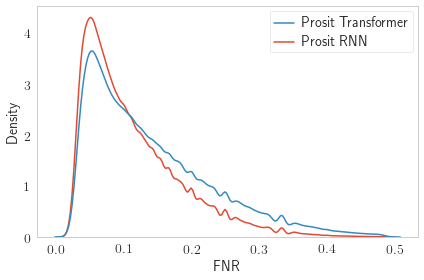

In [16]:
ax = sns.kdeplot(data=filterDf(datafile, "FNR", 0, 0.5), x="FNR", 
            hue="Data Set", hue_order= ['Prosit Transformer', 
                              'Prosit RNN'],
            palette=palette)

#plt.legend(title='', loc='upper right', labels=['Prosit Transformer', 'Prosit RNN'], prop={"size":14})

A = ax.get_legend()
A.set_title('')

plt.setp(A.get_texts(), fontsize='14') # for legend text
plt.setp(A.get_title(), fontsize='14') # for legend title

plt.xlabel("FNR", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.tight_layout()

#seaborn.histplot(data=filterDf(datafile), x="Angular Similarity", hue="Data Set", alpha=0.2)
plt.savefig('./plots/FNR.png')

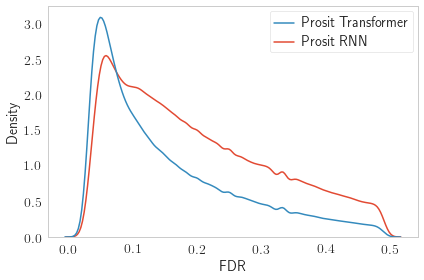

In [17]:

ax = sns.kdeplot(data=filterDf(datafile, "FDR", 0, 0.5), x="FDR", hue="Data Set", 
                                hue_order= ['Prosit Transformer', 
                              'Prosit RNN'],palette=palette)

#plt.legend(title='', loc='upper right', labels=['Prosit Transformer', 'Prosit RNN'], prop={"size":14})

A = ax.get_legend()
A.set_title('')

plt.setp(A.get_texts(), fontsize='14') # for legend text
plt.setp(A.get_title(), fontsize='14') # for legend title

plt.xlabel("FDR", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.tight_layout()

#seaborn.histplot(data=filterDf(datafile), x="Angular Similarity", hue="Data Set", alpha=0.2)
plt.savefig('./plots/FDR.png')

In [255]:
!pwd

/home/ekvall/prosittransformer/notebooks


In [100]:
import pandas as pd

In [102]:
!ls /sdd/berzelius/ceCalibration/

CeCalibation.csv  CeCalibation.png


In [114]:
def _makeFig(df: pd.DataFrame)->None:
    """Create figure"""
    fs=26 + 5
    plt.figure(figsize=(16, 10))
    ax = seaborn.lineplot(x="ce", y="sa", marker="o", hue="CE", data = df, palette=["C0", "C1", "C2","C3", "C4"])
    legend = ax.legend(handles=ax.legend_.legendHandles,
                       prop={"size":fs})
    plt.xlabel("Collision Energy", fontsize=fs)
    plt.ylabel("Median Angular Similarity", fontsize=fs)
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.plot([0.2, 0.2], [0, 1], color="C0")
    plt.plot([0.25, 0.25], [0, 1], color="C1")
    plt.plot([0.3, 0.3], [0, 1], color="C2")
    plt.plot([0.35, 0.35], [0, 1], color="C3")
    plt.plot([0.4, 0.4], [0, 1], color="C4")
    plt.tight_layout()
    plt.savefig('./plots/CeCalibration.png')

In [115]:
#df = pd.read_csv("/sdd/berzelius/ceCalibration/CeCalibation.csv", index_col=0)

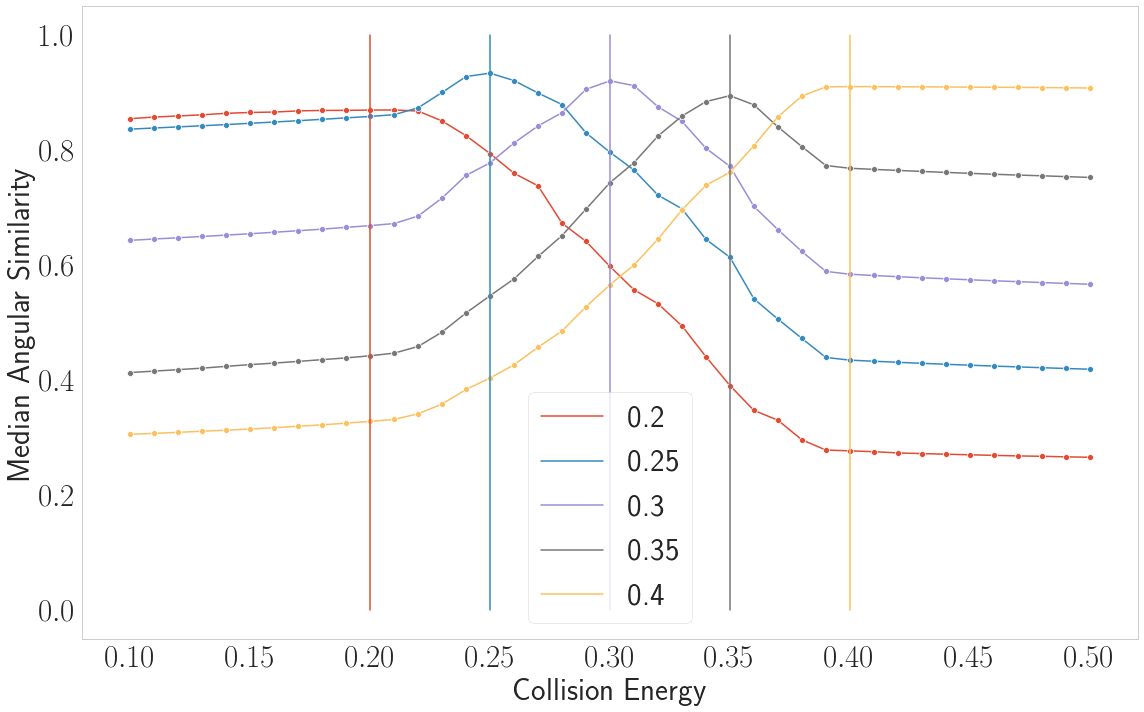

In [116]:
_makeFig(df)

In [ ]:
ax = sns.histplot(data=filterDf(datafile), x="Angular Similarity", hue="Data Set", alpha=0.2,kde =True)

ax.invert_xaxis()

#sns.kdeplot(data=filterDf(tape_df), x="spectral_angle", hue="data_set")
plt.legend(title='', loc='upper right', labels=['Prosit Transformer', 'Prosit RNN'], prop={"size":14})
plt.xlabel("Angular Similarity", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.tight_layout()

#seaborn.histplot(data=filterDf(datafile), x="Angular Similarity", hue="Data Set", alpha=0.2)
#plt.savefig('./plots/spectralAngleDist_x_reverse.png')

<AxesSubplot:xlabel='Angular Similarity', ylabel='Count'>

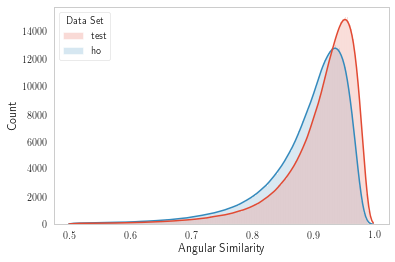

In [57]:
seaborn.histplot(data=filterDf(datafile), x="Angular Similarity", hue="Data Set", alpha=0.2,kde =True)

In [ ]:
seaborn.distplot()